# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected.

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to aneuron from a background pixel?

* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tifffile as tiff  # If your video is in .tif format
import os

# Define the path to your video file (update the filename as needed)
video_path = '/content/caiman_video_trial_0.tif'  # or '/content/calcium_video.tif'

# Load the video
video_data = tiff.imread(video_path)  # shape: (frames, height, width)
print(f"Video shape: {video_data.shape}")

Video shape: (500, 300, 400)


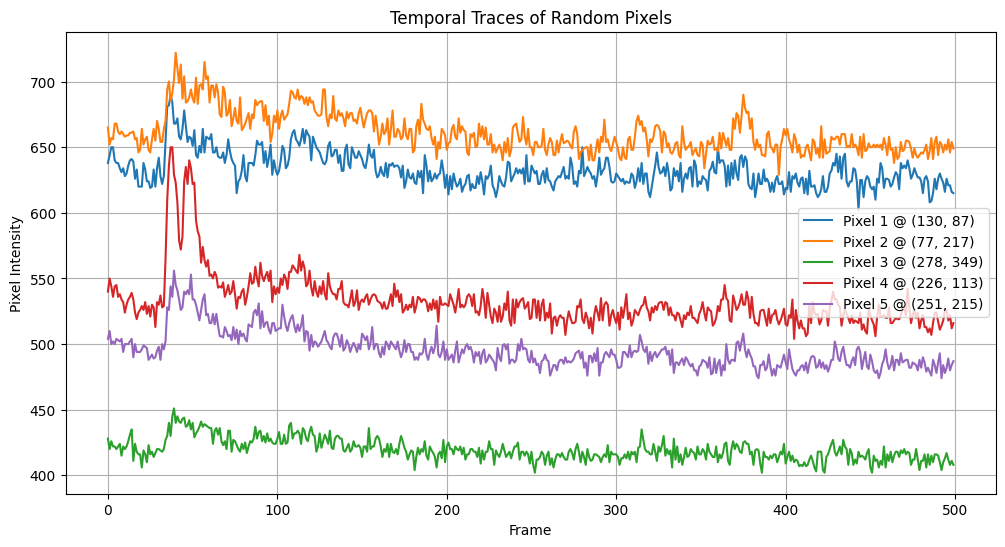

In [2]:
# Parameters
N = 5  # Number of random pixels

# Get dimensions
num_frames, height, width = video_data.shape

# Select N random (x, y) positions
random_pixels = [(random.randint(0, height-1), random.randint(0, width-1)) for _ in range(N)]

# Plot the temporal trace for each pixel
plt.figure(figsize=(12, 6))
for i, (y, x) in enumerate(random_pixels):
    pixel_trace = video_data[:, y, x]
    plt.plot(pixel_trace, label=f'Pixel {i+1} @ ({y}, {x})')
plt.title("Temporal Traces of Random Pixels")
plt.xlabel("Frame")
plt.ylabel("Pixel Intensity")
plt.legend()
plt.grid(True)
plt.show()

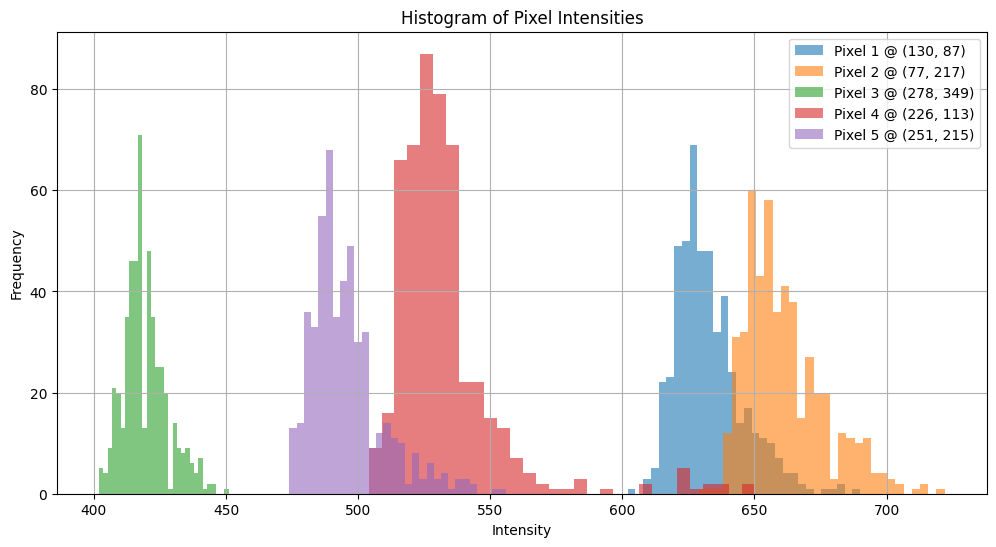

In [3]:
# Plot histograms
plt.figure(figsize=(12, 6))
for i, (y, x) in enumerate(random_pixels):
    pixel_trace = video_data[:, y, x]
    plt.hist(pixel_trace, bins=30, alpha=0.6, label=f'Pixel {i+1} @ ({y}, {x})')
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Calcium indicators increase fluorescence when bound to calcium, which happens during neuronal activity. Thus, temporal traces of pixels in active neurons show fluctuations corresponding to calcium transients.

Why not analyze raw pixel traces directly?
  - **Noise**: Single-pixel traces are noisy and may contain signal from multiple sources.
  - **Spatial spread**: Neuronal signals typically span multiple pixels due to the size of the neuron and light scattering.
  - **Overlapping neurons**: Signal from overlapping neurons cannot be resolved without source extraction.
  - **Robustness**: Source extraction aggregates signals over spatial components, increasing SNR.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video.

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


In [5]:
# Install dependencies and CaImAn
!pip install cmake
!apt-get install -y libtiff5-dev libfftw3-dev libblas-dev liblapack-dev \
    libhdf5-serial-dev libatlas-base-dev gfortran python3-dev
!pip install caiman


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
gfortran is already the newest version (4:11.2.0-1ubuntu1).
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libatlas-base-dev is already the newest version (3.10.3-12ubuntu1).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
Suggested packages:
  liblapack-doc libfftw3-doc
The following NEW packages will be installed:
  libblas-dev libfftw3-bin libfftw3-dev libfftw3-double3 libfftw3-long3
  libfftw3-quad3 libfftw3-single3 libtiff5-dev
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,820 kB of archives.
After this operation, 25.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libblas-dev amd64 3.10.0-2ubuntu1 [164 kB]
G

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf.cnmf_params import CNMFParams

# Video path (update if needed)
video_path = '/content/caiman_video_trial_0.tif'

# Load video
import tifffile
video = tifffile.imread(video_path)
print("Video shape:", video.shape)

# Define filter sizes to test
gSig_filt_values = [1, 3, 5, 7, 9]  # Try fewer if Colab is slow

# Function to compute crispness (sum of spatial gradients)
def compute_crispness(image):
    grad_y, grad_x = np.gradient(image.astype(np.float32))
    return np.sqrt((grad_x**2 + grad_y**2).sum())


ModuleNotFoundError: No module named 'caiman.motion_correction'

## Exercise 3: Source extraction parameters
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.